In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [12]:
tweets=pd.read_csv("Elon_musk.csv" ,encoding='cp1252')
tweets.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [13]:
len(tweets.index)

1999

In [14]:
tweets["Tweets"] = tweets["Text"]

In [15]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [17]:
words_data

,Frequency
Word,
’,237
&amp;,216
…,140
@erdayastronaut,140
@spacex,138
...,...
progress,7
neuralink,7
close,7


In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


We use the VADER Sentiment Analyzer in order to perform the sentiment analysis.

According to GeeksforGeeks, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Text(0, 0.5, 'Count')

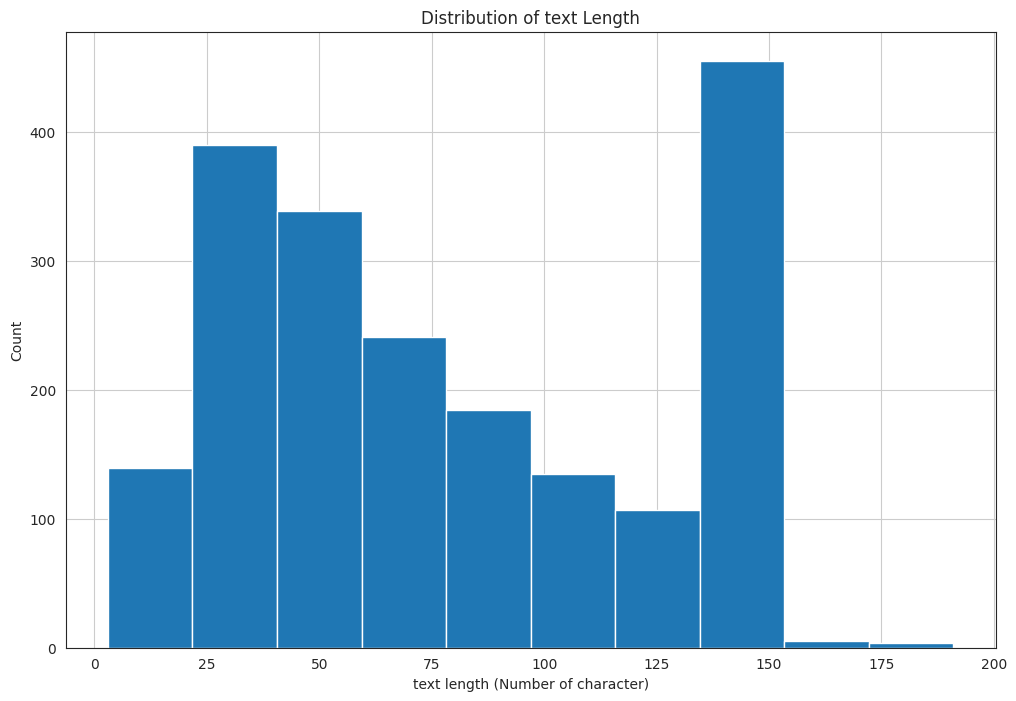

In [20]:
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [21]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [22]:
## removing punctuation from review..#
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [23]:
## Remove Numbers from tweets...##
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')

<ipython-input-23-0413238fa286>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')


In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words=stopwords.words('english')

In [26]:
tweets["Tweets"]=tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [27]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)

    return Tweets

clean = lambda x: clean_Tweets(x)

In [28]:
tweets.head(5)

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 I’m an alien,kunalb i’m alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from textblob import Word
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [31]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [33]:
Tweets_set=tweets["Tweets"]

In [34]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)

In [35]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

# vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
# sparse_matrix = vectorizer.fit_transform(tweets['Tweets'])
# frequencies = sum(sparse_matrix).toarray()[0]
# ngrams = pd.DataFrame(frequencies, index=vectorizer.get_feature_names_out(), columns=['frequency'])
# ngrams = ngrams.sort_values(by='frequency', ascending=False)
# ngrams

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

  (0, 113)	0.6623688405640785
  (0, 2687)	0.7491778954626188
  (1, 4547)	0.3503086432516702
  (1, 3152)	0.39490911009737484
  (1, 1652)	0.4162521748644735
  (1, 890)	0.35842289988597426
  (1, 4524)	0.4162521748644735
  (1, 3622)	0.4162521748644735
  (1, 2420)	0.2703073340188711
  (2, 2537)	0.5043290017718325
  (2, 1583)	0.3080284702583498
  (2, 4133)	0.5704255952716918
  (2, 2609)	0.5704255952716918
  (3, 4650)	0.6108339384056402
  (3, 1050)	0.5037497388423235
  (3, 1602)	0.6108339384056402
  (4, 1244)	0.2876711653018475
  (4, 3151)	0.27277696499630993
  (4, 4936)	0.24937628204523501
  (4, 2708)	0.32114907525749786
  (4, 1272)	0.4094092137495757
  (4, 141)	0.3260835812455286
  (4, 652)	0.3525306208428504
  (4, 4360)	0.1828625922881543
  (4, 775)	0.3260835812455286
  :	:
  (1994, 147)	0.13917721113851475
  (1994, 4555)	0.2117618765707303
  (1994, 1395)	0.16274369098951297
  (1995, 21)	0.4008409077440879
  (1995, 688)	0.4008409077440879
  (1995, 4355)	0.36570555829866774
  (1995, 764)	0.

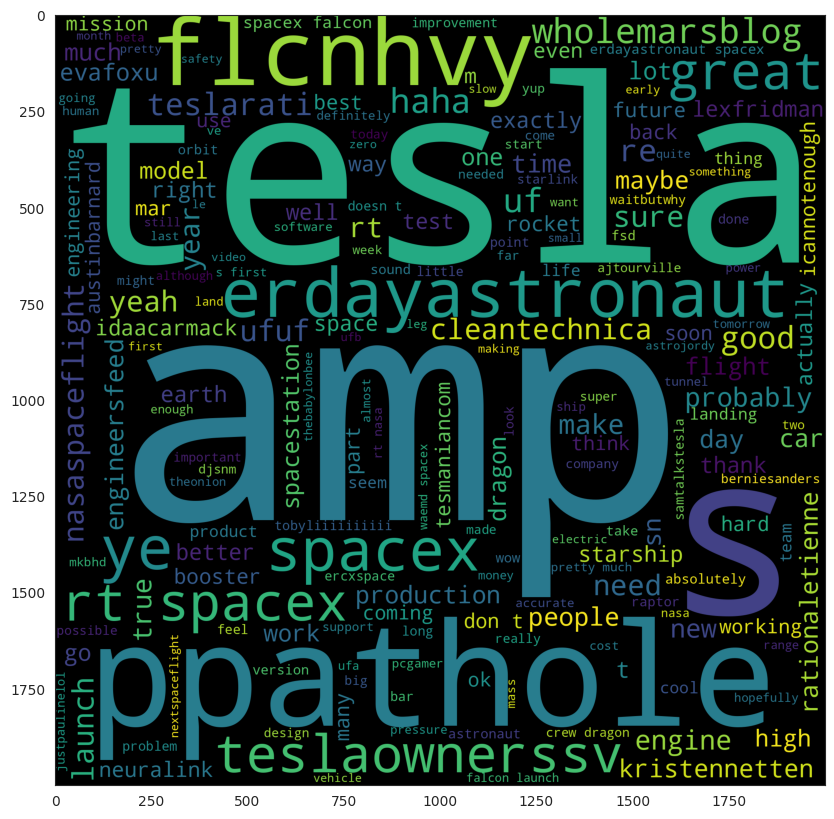

In [58]:
Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [59]:
freq = pd.Series(' '.join(tweets["Tweets"]).split()).value_counts()[0:20]
freq

spacex             237
amp                216
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
launch              55
it’s                54
uf                  53
good                52
year                48
sure                43
dtype: int64

In [60]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head(5)

,Tweets,polarity
0,kunalb i’m alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [62]:
# Displaying top 5 positive posts of Category_A
tweets[tweets.polarity>0].head(5)

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [63]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb i’m alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.152381
1995,1996,ppathole make sure read ur term amp condition ...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [64]:
def sent_type(Tweets):
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [65]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [66]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

<Axes: xlabel='category', ylabel='count'>

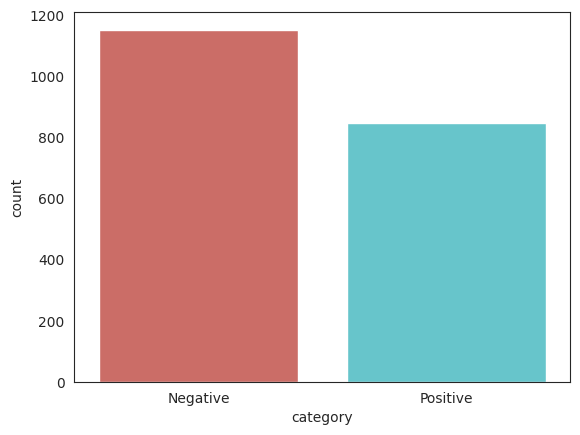

In [67]:
sns.countplot(x='category',data=tweets,palette='hls')

In [68]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.628814
Positive    42.371186
Name: category, dtype: float64

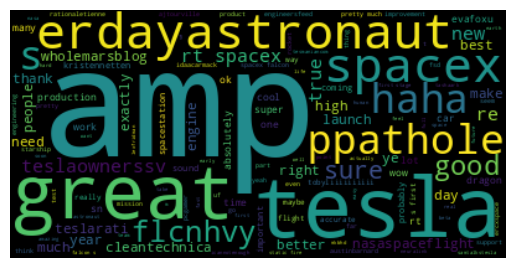

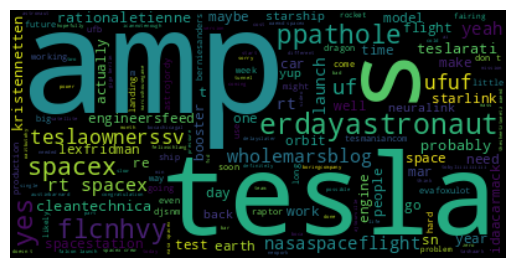

In [69]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


Conclusion:-We have created work cloud on he is used in his tweet very frequently that words are amp,great,tesla,spacex and according to sentiment probability the used 58% negative word & 42% positive word.